In [1]:
import json
from matplotlib import pyplot as plt
from matplotlib import colormaps
import os
from PIL import Image

%matplotlib ipympl
# %matplotlib inline

/tmp/ipykernel_9042/3756328269.py:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(label['x'], label['y'], s = 1, c = color_dict[label['label']], label=label['label'])
/tmp/ipykernel_9042/3756328269.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,ax = plt.subplots()


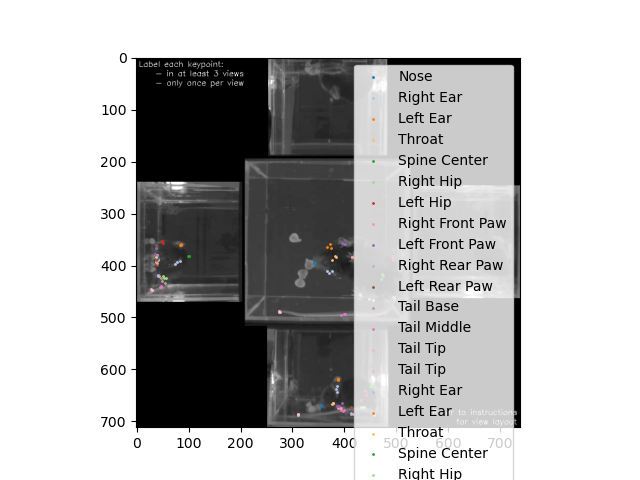

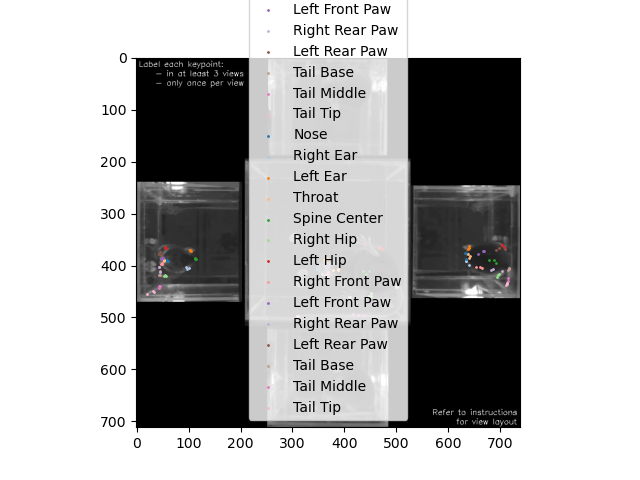

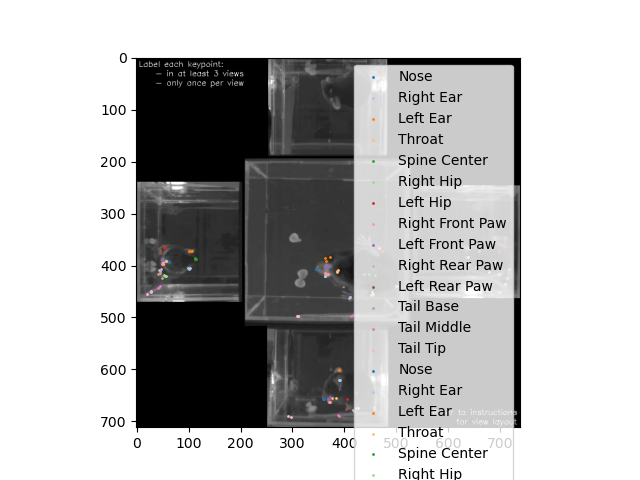

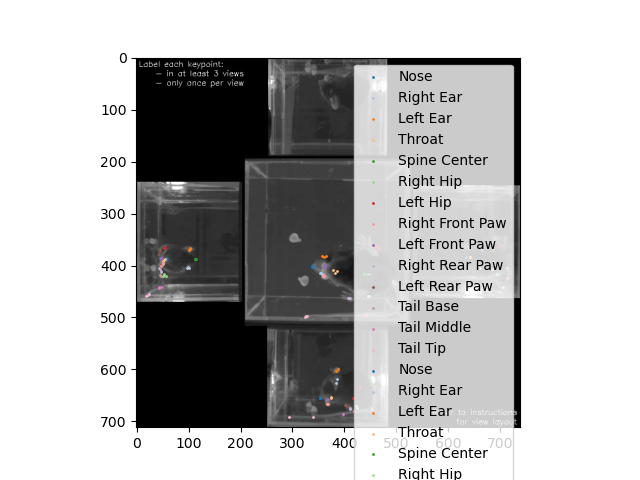

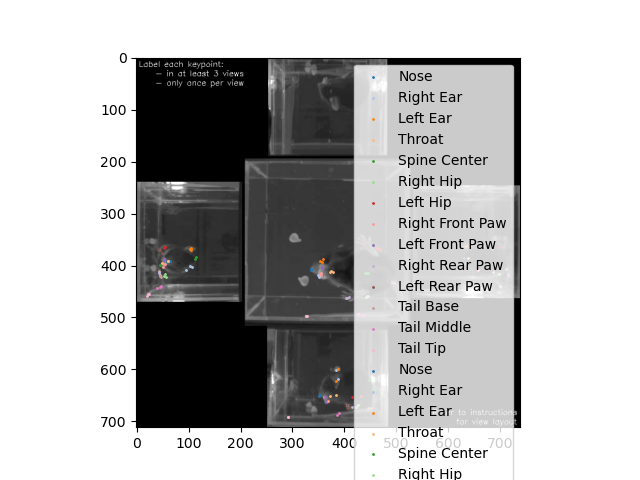

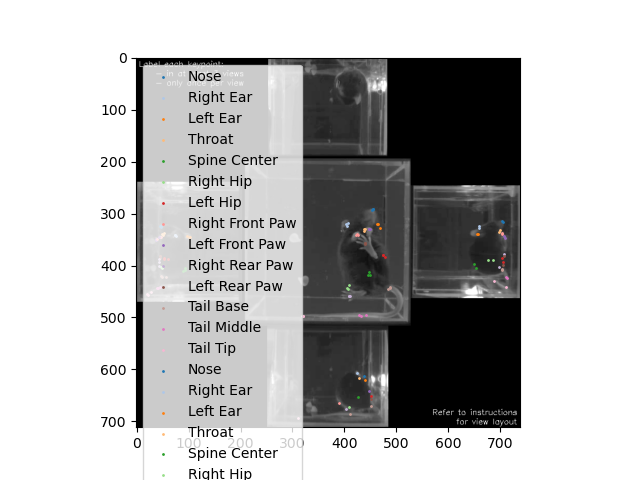

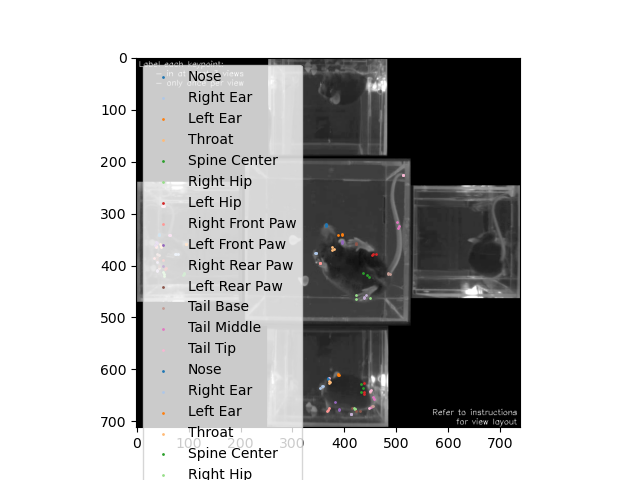

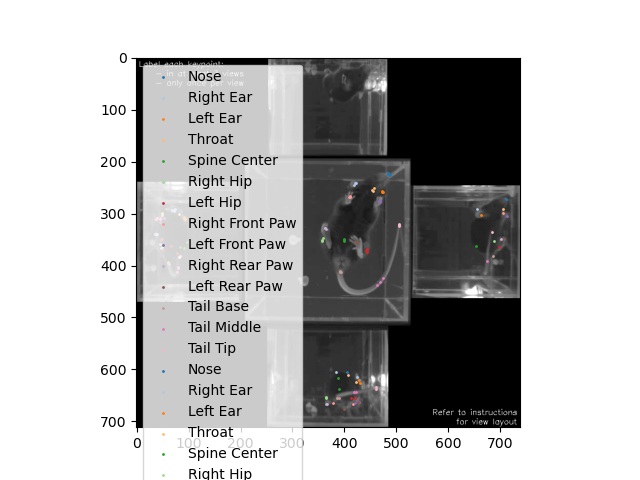

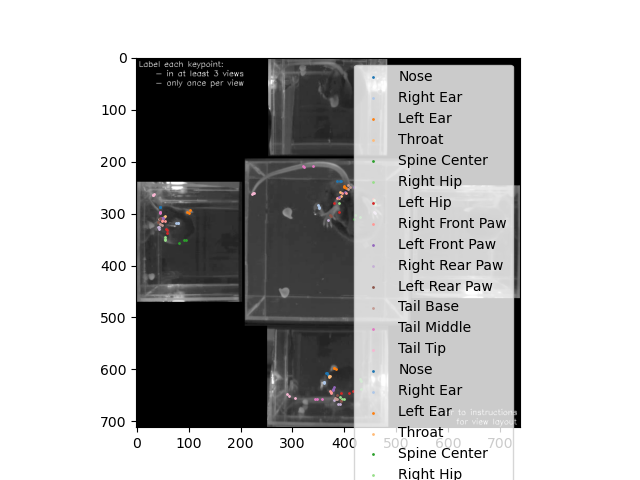

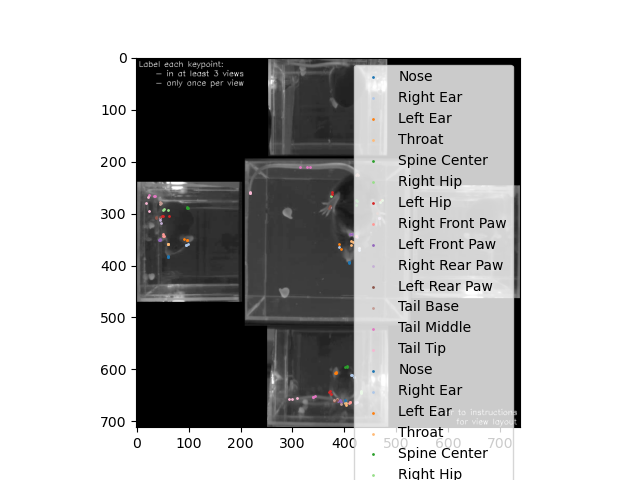

In [15]:
image_dir = '/home/klb807/MARS_project/3d/annotation_data/raw_images'
fid = open('/home/klb807/MARS_project/3d/annotation_data/output.manifest')

labels = ['Nose','Right Ear','Left Ear', 'Throat', 'Spine Center', 'Right Knee', 'Left Knee', 'Right Front Paw', 'Left Front Paw', 'Right Rear Paw', 'Left Rear Paw', 'Tail Base', 'Tail Middle', 'Tail Tip']
cmap = colormaps['tab20'].colors

color_dict = {labels[ii]:cmap[ii] for ii in range(len(labels))}


for i_line,line in enumerate(fid.readlines()):
    fig,ax = plt.subplots()
    # set up image file path
    image_path = os.path.join(image_dir,os.path.split(json.loads(line)['source-ref'])[-1])
    
    # pull out the keypoints
    im_array = Image.open(image_path)
    ax.imshow(im_array)
    

    data = json.loads(line)['annotatedResult']
    for worker_label in data['annotationsFromAllWorkers']:
        sub_data = eval(worker_label['annotationData']['content'])
        for label in sub_data['annotatedResult']['keypoints']:
            ax.scatter(label['x'], label['y'], s = 1, c = color_dict[label['label']], label=label['label'])

        ax.legend()
            
    fig.savefig(os.path.splitext(image_path)[0] + '_labeled.png', dpi=300)


fid.close()

In [13]:
json.loads(line)['annotatedResult']

{'annotationsFromAllWorkers': [{'workerId': 'vendor.us-east-2.d90f632b1e2dfc2b',
   'annotationData': {'content': '{"annotatedResult":{"inputImageProperties":{"height":712,"width":738},"keypoints":[{"label":"Nose","x":342,"y":395},{"label":"Right Ear","x":371,"y":414},{"label":"Left Ear","x":373,"y":359},{"label":"Throat","x":383,"y":383},{"label":"Spine Center","x":475,"y":420},{"label":"Right Hip","x":456,"y":467},{"label":"Left Hip","x":492,"y":381},{"label":"Right Front Paw","x":415,"y":384},{"label":"Left Front Paw","x":395,"y":357},{"label":"Right Rear Paw","x":431,"y":456},{"label":"Left Rear Paw","x":504,"y":379},{"label":"Tail Base","x":496,"y":460},{"label":"Tail Middle","x":393,"y":495},{"label":"Tail Tip","x":276,"y":490},{"label":"Tail Tip","x":41,"y":387},{"label":"Right Ear","x":77,"y":394},{"label":"Left Ear","x":83,"y":360},{"label":"Throat","x":39,"y":379},{"label":"Spine Center","x":99,"y":382},{"label":"Right Hip","x":52,"y":425},{"label":"Left Hip","x":49,"y":354},